# SIT320 - Advanced Algorithms
## Module Nine - Linear Programming

---

### Graphically solving Linear Programming Problems

![Lp1](Lp1.png)

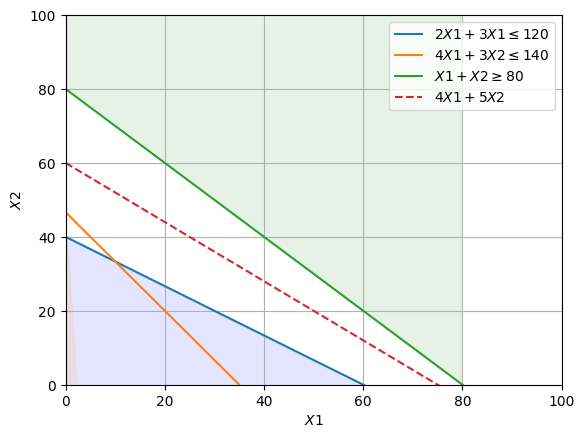

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the inequality constraints
X = np.linspace(0, 150, 400)
y1 = (120 -2*X) / 3
y2 = (140 - 4*X) / 3
y3 = 80 - X



# Plot the inequalities
plt.plot(X, y1, label=r'$2X1 + 3X1 \leq 120$')
plt.fill_betweenx(y1, 0, X, alpha=0.1, color='blue')
plt.plot(X, y2, label=r'$4X1 + 3X2 \leq 140$')
plt.fill_betweenx(y2, 0, x, alpha=0.1, color='orange')
plt.plot(X, y3, label=r'$X1 + X2 \geq 80$')
plt.fill_between(X, y3, 1000, where=y3>=0, alpha=0.1, color='green')

# Plot the objective function for some Z value
Z = 300
y4 = (Z - 4*X) / 5
plt.plot(X, y4, label=r'$4X1 + 5X2$', linestyle='--')


# Add labels and legends
plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel(r'$X1$')
plt.ylabel(r'$X2$')
plt.legend()
plt.grid(True)
plt.show()



<span style="color:red">**NO Feasible Region Exists**</span>


---

### LU Decomposition

In [71]:
import itertools
def LUDecomposition(A):
    """LU Decomposition of a matrix A
    Input: A - a square matrix
    Output: L - a lower triangular matrix
            U - an upper triangular matrix
    """
    n = len(A)
    U = [["." for _ in range(n)] for _ in range(n)]
    # initialise U with 0s below the diagonal
    for i in range(n):
        for j in range(i):
            U[i][j] = 0
    # initialise L with 0s above the diagonal and 1s on the diagonal
    L = [["." for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j in range(i+1,n):
            L[i][j] = 0
        L[i][i] = 1
        for k in range(i,n):
            U[k][k] = A[k][k]
            for i in range(k+1,n):
                L[i][k] = A[i][k]/U[k][k]
                U[k][i] = A[k][i]
            for i, j in itertools.product(range(k+1,n), range(k+1,n)):
                A[i][j] = A[i][j] - L[i][k]*U[k][j]
    return L,U

def ForwardSubstitution(L,b):
    """Solves the system Lx = b
    Input: L - a lower triangular matrix
            b - a vector
    Output: y - a vector
    """
    n = len(L)
    y = [0 for _ in range(n)]
    for i in range(n):
        y[i] = b[i]
        for j in range(i):
            y[i] = y[i] - L[i][j]*y[j]
    return y

def BackwardSubstitution(U,y):
    """Solves the system Ux = y
    Input: U - an upper triangular matrix
            y - a vector
    Output: x - a vector
    """
    n = len(U)
    x = [0 for _ in range(n)]
    for i in range(n-1,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] = x[i] - U[i][j]*x[j]
        x[i] = x[i]/U[i][i]
    return x


In [72]:
import numpy as np
A = [[1,2,3],[4,5,6],[7,8,9]]
L, U = LUDecomposition(A)
print("\nL:")
for line in L:
    print(line)
print("\nU:")
for line in U:
    print(line)

b = [1,2,3]
y = ForwardSubstitution(L,b)
x = BackwardSubstitution(U,y)
print("\nx:")
print(x)





L:
[1, 0, 0]
[4.0, 1, 0]
[7.0, 2.0, 1]

U:
[1, 2, 3]
[0, -3.0, -6.0]
[0, 0, 12.0]

x:
[-0.33333333333333326, 0.6666666666666666, 0.0]


### Simplex Method

![Lp2](Lp2.png)